In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os
for dirname, _, filenames in os.walk('./광안대교_앵커리지1_신규.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use(['seaborn-pastel'])        
        
df = pd.read_csv('./광안대교_앵커리지1_신규.csv')

df.rename(columns = {"Unnamed: 0" : "Day"},inplace = True)

df_prophet = df.copy()
df_prophet.dropna(axis=0, subset=['electricPotential'], inplace = True)
df_prophet['electricPotential'] = -1 * df_prophet['electricPotential']
df_prophet.info()
df.info()

df.plot(figsize=(16,8), subplots=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9774 entries, 0 to 204241
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dateTime           9774 non-null   object 
 1   temperature        0 non-null      float64
 2   salinity           0 non-null      float64
 3   condolence         0 non-null      float64
 4   electricPotential  9774 non-null   float64
dtypes: float64(4), object(1)
memory usage: 458.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dateTime           204277 non-null  object 
 1   temperature        185534 non-null  float64
 2   salinity           178093 non-null  float64
 3   condolence         194433 non-null  float64
 4   electricPotential  9774 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.8+ 

In [107]:
df.head()

dateTime  temperature  salinity  condolence  electricPotential
0  2020-10-20 11:30:17          NaN       NaN         NaN             -881.0
1  2020-10-20 11:35:17          NaN       NaN         NaN             -880.0
2  2020-10-20 11:40:18          NaN       NaN         NaN             -881.0
3  2020-10-20 11:45:17          NaN       NaN         NaN             -880.0
4  2020-10-20 11:53:07          NaN       NaN         NaN             -879.0

In [108]:
df_tt = df.drop(['electricPotential'], axis=1)


df_tt = df_tt.set_index(pd.to_datetime(df['dateTime']))
df_tt.info()
df_tt.head
df_tt.plot(figsize=(16,8), subplots=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204277 entries, 2020-10-20 11:30:17 to 2021-04-20 11:45:00
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dateTime     204277 non-null  object 
 1   temperature  185534 non-null  float64
 2   salinity     178093 non-null  float64
 3   condolence   194433 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.8+ MB


In [109]:
df_test = pd.DataFrame()
df = df.set_index(pd.to_datetime(df['dateTime']))

if df['electricPotential'].notnull:
    if df['salinity'].isnull:
        df['salinity'].interpolate(method='bfill', inplace=True)
    if df['condolence'].isnull:
        df['condolence'].interpolate(method='bfill', inplace=True)
    if df['temperature'].isnull:
        df['temperature'].interpolate(method='bfill', inplace=True)
    #df['salinity'].interpolate(method='pad', inplace=True)
    #df['condolence'].interpolate(method='pad', inplace=True)
    #df['temperature'].interpolate(method='pad', inplace=True)

df.dropna(subset=['electricPotential'], inplace = True)
df_test = df
df_test['electricPotential'] = -1 * df['electricPotential']
df_test[['salinity','condolence','temperature']].astype('float64')

df_test = df_test.drop(['dateTime'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9774 entries, 2020-10-20 11:30:17 to 2021-04-20 11:10:29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dateTime           9774 non-null   object 
 1   temperature        9774 non-null   float64
 2   salinity           9774 non-null   float64
 3   condolence         9774 non-null   float64
 4   electricPotential  9774 non-null   float64
dtypes: float64(4), object(1)
memory usage: 458.2+ KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9774 entries, 2020-10-20 11:30:17 to 2021-04-20 11:10:29
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9774 non-null   float64
 1   salinity           9774 non-null   float64
 2   condolence         9774 non-null   float64
 3   electricPotential  9774 non-null   float64
dtypes: float64(4)
memory usage: 381.8 KB


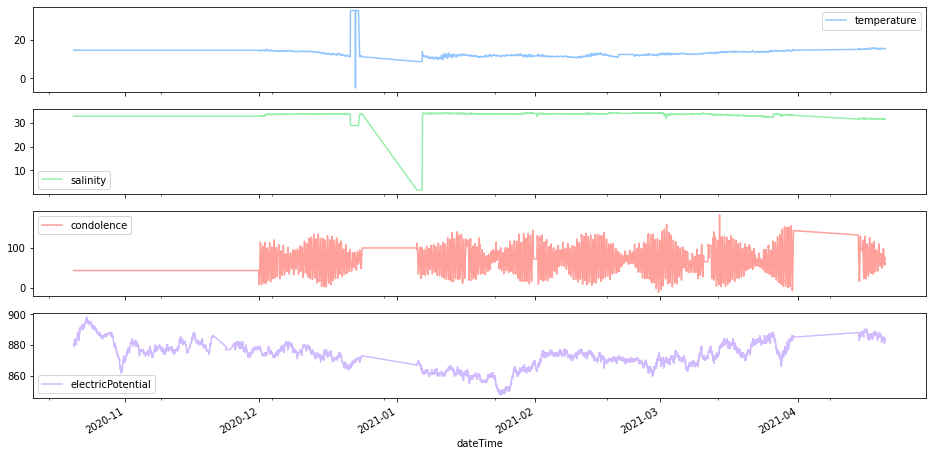

In [110]:
df_test.info()
df_test.plot(figsize=(16,8), subplots=True)
plt.show()

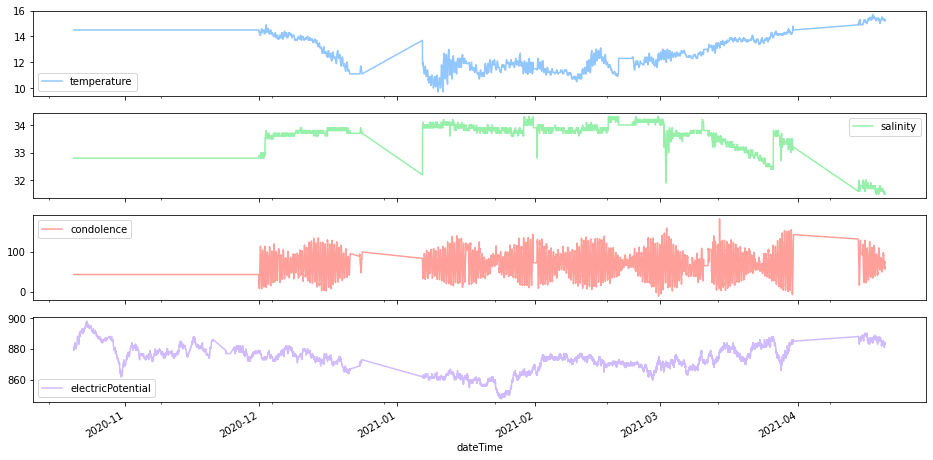

In [111]:
#df_test['salinity'].fillna(method='pad', inplace=True)
#df_test['condolence'].fillna(method='pad', inplace=True)
#df_test['temperature'].fillna(method='pad', inplace=True)
#df_test['electricPotential'].fillna(method='pad', inplace=True)
#df_test['dateTime'].fillna(method='pad', inplace=True)
#df_test['salinity'].fillna(method='bfill', inplace=True)
#df_test['condolence'].fillna(method='bfill', inplace=True)
#df_test['temperature'].fillna(method='bfill', inplace=True)
#df_test['electricPotential'].fillna(method='bfill', inplace=True)


##이상값 처리

quartiles = np.percentile(df_test['salinity'],[25,50,75])
IQR = (quartiles[2]-quartiles[0])
search_df = df_test[(df_test['salinity'] < (quartiles[0] - 1.5 * IQR)) | (df_test['salinity'] > (quartiles[2] + 1.5 * IQR))]
df_test = df_test.drop(search_df.index,axis=0)
quartiles = np.percentile(df_test['temperature'],[25,50,75])
IQR = (quartiles[2]-quartiles[0])
search_df = df_test[(df_test['temperature'] < (quartiles[0] - 1.5 * IQR)) | (df_test['temperature'] > (quartiles[2] + 1.5 * IQR))]
df_test = df_test.drop(search_df.index,axis=0)

df_test2 = df_test.copy()


df_test
df_test2.plot(figsize=(16,8), subplots=True)
plt.show()
#df_test2.info()

<AxesSubplot:>

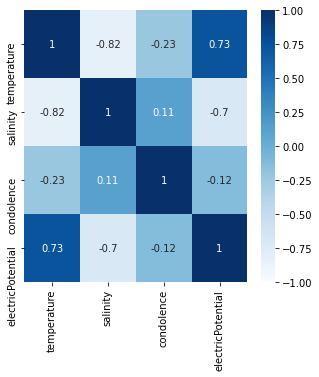

In [112]:
#변수간 상관관계 히트맵
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(df_test2.corr(),
           annot = True,
           cmap = 'Blues',
           vmin = -1, vmax=1,
          )

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]
0
0
0
1
0
2


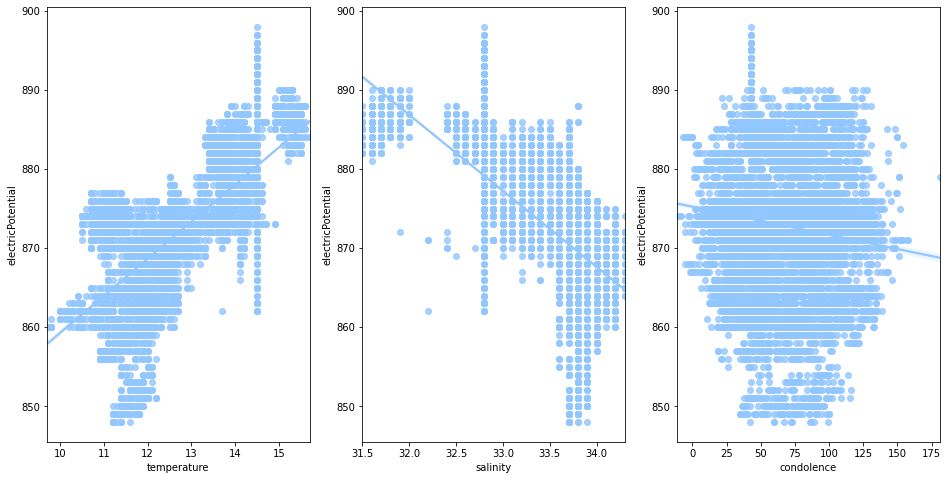

In [113]:
df_test.to_csv("./Busan_Data/Gwangan/GwangAnBridge_1H(for xgboost)")

fig, axs = plt.subplots(figsize=(16,8), ncols=3, nrows=1, squeeze=False)
features = ['temperature', 'salinity', 'condolence']
print(axs)
for i, feature in enumerate(features):
    row = 0
    print(row)
    col = i%4
    print(col)
    sns.regplot(x=feature, y='electricPotential', data=df_test, ax=axs[row][col])

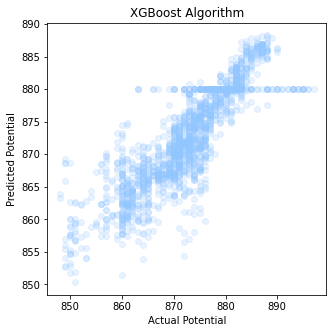

MSE : 18.992, RMSE : 4.358
Variance score : 0.745


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
df_testq = df_test.astype('float64')
y_data = df_testq['electricPotential']
x_data = df_testq[['salinity','condolence','temperature']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, test_size=0.2, random_state=12)

xgb_mod = xgb.XGBRegressor(
   booster='gbtree',
    gamma=10,     
    reg_lambda=10,
    reg_alpha=10,
    min_child_weight=10,
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=10000,                                                                    
    subsample=0.8,
    random_state=12
    
) 

xgb_mod.fit(x_train, y_train)
xgb_predictions = xgb_mod.predict(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)

plt.scatter(y_test, xgb_predictions, alpha=0.2)
plt.xlabel("Actual Potential")
plt.ylabel("Predicted Potential")
plt.title("XGBoost Algorithm")
plt.show()

mse = mean_squared_error(y_test, xgb_predictions)
rmse = np.sqrt(mse)

print('MSE : {0:.3F}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,xgb_predictions)))

dt_clf = DecisionTreeClassifier(random_state=12)
rf_clf = RandomForestClassifier(random_state=12)
lr_clf = LogisticRegression(solver='lbfgs', max_iter=4000)

#dt_clf.fit(x_train, y_train)
#dt_pred = dt_clf.predict(x_test)
#print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#rf_clf.fit(x_train, y_train)
#rf_pred = rf_clf.predict(x_test)
#print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
#lr_clf.fit(x_train, y_train)
#lr_pred = lr_clf.predict(x_test)
#print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

In [114]:
df_prophet2 = df_prophet.rename(columns = {'dateTime' :'ds', 'electricPotential' : 'y'})
df_prophet2.to_csv("./Busan_Data/Gwangan//GwangAnBridge_1H(for prophet)")

df_prophet2.head()

ds  temperature  salinity  condolence      y
0  2020-10-20 11:30:17          NaN       NaN         NaN  881.0
1  2020-10-20 11:35:17          NaN       NaN         NaN  880.0
2  2020-10-20 11:40:18          NaN       NaN         NaN  881.0
3  2020-10-20 11:45:17          NaN       NaN         NaN  880.0
4  2020-10-20 11:53:07          NaN       NaN         NaN  879.0

<AxesSubplot:xlabel='ds'>

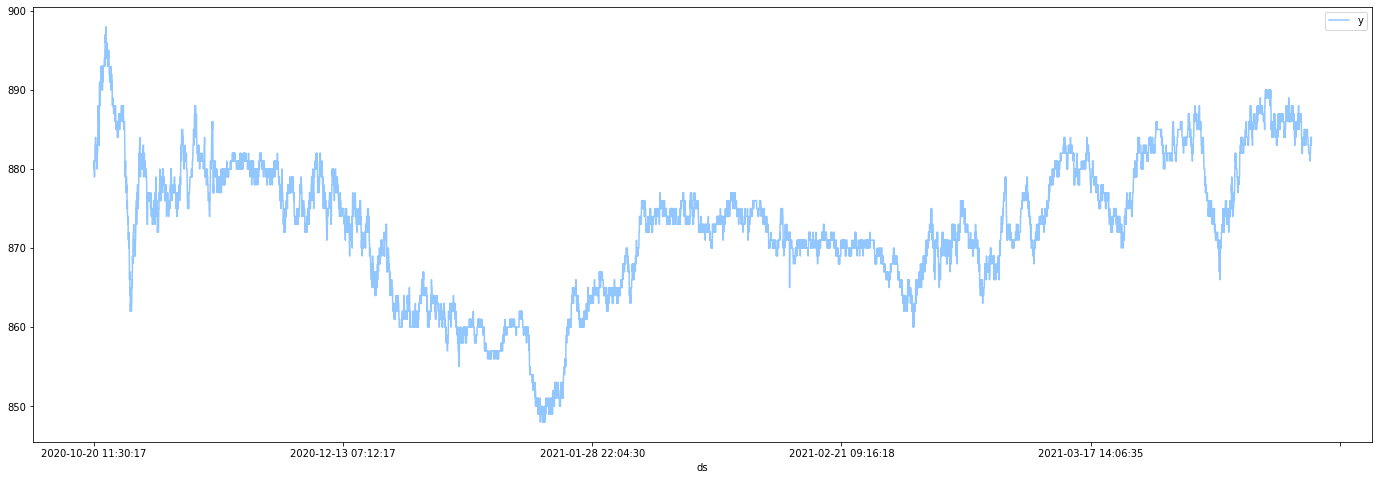

In [115]:
ax = plt.gca()
#df_test2.plot(kind='line', x='ds', y='y', ax=ax,label='electricPotential', figsize=(24,8))

df_prophet2.plot(kind='line', x='ds', y='y', ax=ax, figsize=(24,8))

In [116]:
#df_prophet2.loc[(df_prophet2['ds'] > '2020-12-24') & (df_prophet2['ds'] < '2021-01-05'), 'y'] = None
df_prophet2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9774 entries, 0 to 204241
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ds           9774 non-null   object 
 1   temperature  0 non-null      float64
 2   salinity     0 non-null      float64
 3   condolence   0 non-null      float64
 4   y            9774 non-null   float64
dtypes: float64(4), object(1)
memory usage: 458.2+ KB


In [117]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

df_prophet2['cap'] = 1000
df_prophet2['floor'] = 700

model = Prophet(growth='logistic', weekly_seasonality=28,daily_seasonality=15,yearly_seasonality=10, 
                seasonality_mode='additive', seasonality_prior_scale = 3, changepoint_prior_scale=0.1, interval_width=0.80, mcmc_samples=2)
model.add_seasonality(name='monthly', period=30.5, fourier_order=30)

model.fit(df_prophet2, control={'max_treedepth': 10})


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
/home/sqeng/venv/lib/python3.8/site-packages/pystan/diagnostics.py:217: RuntimeWarning:

invalid value encountered in true_divide



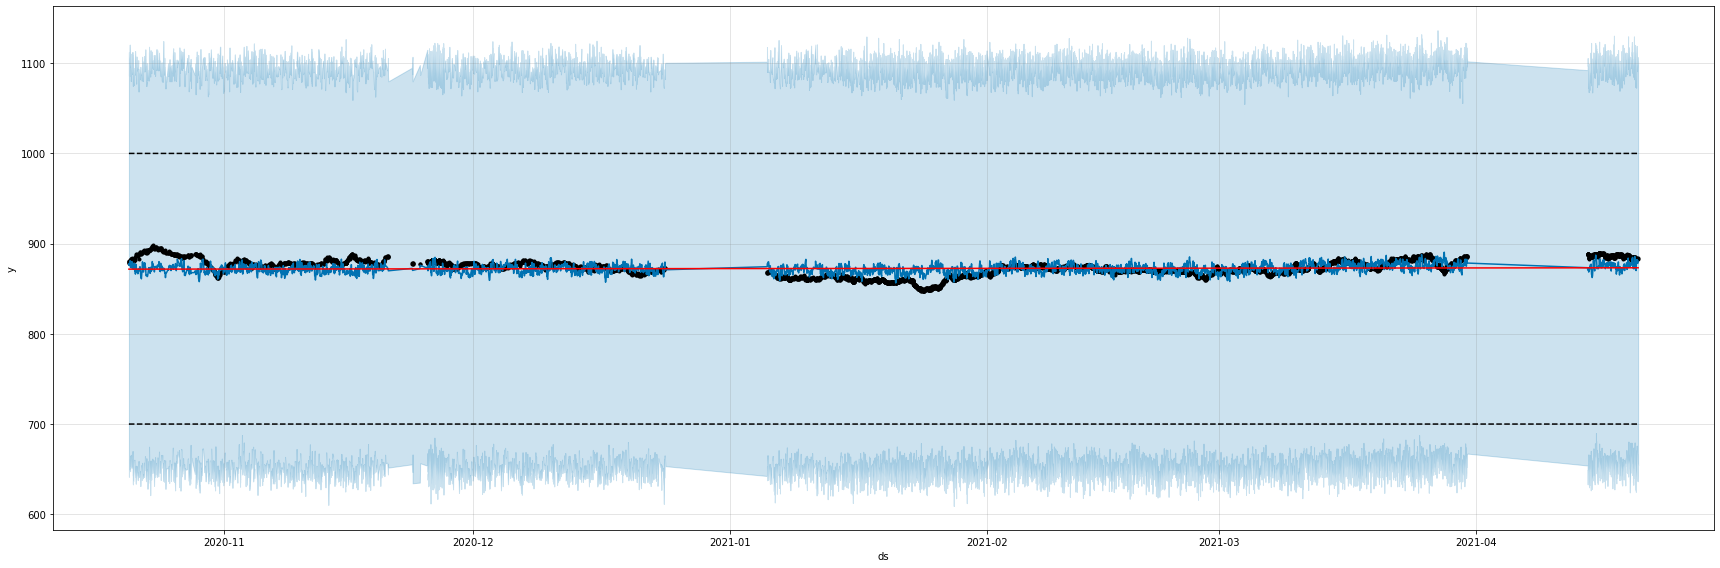

In [124]:
#forecast_t = forecast['ds'].dt.to_pydatetime()
future = model.make_future_dataframe(periods=1, freq='H')
future['cap'] = 1000
future['floor'] = 700
forecast = model.predict(future)

forecast.tail()
fig1 = model.plot(forecast, figsize=(24,8))
changepoint = add_changepoints_to_plot(fig1.gca(), model, forecast)


In [125]:
forecast

ds       trend   cap  floor  yhat_lower   yhat_upper  \
0    2020-10-20 11:30:17  871.710854  1000    700  662.805714  1112.326788   
1    2020-10-20 11:35:17  871.710894  1000    700  641.595216  1086.070801   
2    2020-10-20 11:40:18  871.710935  1000    700  647.136469  1092.726919   
3    2020-10-20 11:45:17  871.710976  1000    700  660.843980  1098.750518   
4    2020-10-20 11:53:07  871.711040  1000    700  648.850822  1105.286158   
...                  ...         ...   ...    ...         ...          ...   
9769 2021-04-20 10:07:35  873.244669  1000    700  666.843882  1100.097402   
9770 2021-04-20 10:09:18  873.244680  1000    700  645.403204  1098.243439   
9771 2021-04-20 11:02:24  873.245019  1000    700  636.603799  1099.871904   
9772 2021-04-20 11:10:29  873.245070  1000    700  656.258450  1106.683620   
9773 2021-04-20 12:10:29  873.245452  1000    700  654.412405  1100.507375   

      trend_lower  trend_upper  additive_terms  additive_terms_lower  ...  \
0      868.969152   875.195774        5.024594             -1.540119  ...   
1      868.969188   875.195821        5.321546             -0.285640  ...   
2      868.969223   875.195869        5.593012              0.330108  ...   
3      868.969259   875.195916        5.827206              0.599590  ...   
4      868.969315   875.195990        6.100805              0.920263  ...   
...           ...          ...             ...                   ...  ...   
9769   869.756068   879.454234        5.545449             -1.530061  ...   
9770   869.756063   879.454272        5.363621             -1.793878  ...   
9771   869.755895   879.455439        4.838267             -7.265659  ...   
9772   869.755869   879.455616        5.307776             -6.365909  ...   
9773   869.755680   879.456935        7.447258              5.747847  ...   

        weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0     0.541715     -4.373703      5.838620  1.484916      0.400361   
1     0.571776     -4.199634      5.697718  1.484520      0.399656   
2     0.621422     -4.017695      5.603131  1.484122      0.398950   
3     0.689916     -3.780740      5.506422  1.483727      0.398247   
4     0.835480     -3.297364      5.349787  1.483106      0.397144   
...        ...           ...           ...       ...           ...   
9769  2.367572     -2.338325      8.058136  1.918835      1.231025   
9770  2.302806     -2.372590      8.036078  1.918723      1.230639   
9771  0.721605     -4.538327      6.772874  1.915265      1.218715   
9772  0.610857     -4.660717      6.512257  1.914737      1.216900   
9773  1.313573     -1.771010      4.988577  1.910815      1.203428   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         2.658678                   0.0                         0.0   
1         2.659119                   0.0                         0.0   
2         2.659560                   0.0                         0.0   
3         2.659998                   0.0                         0.0   
4         2.660685                   0.0                         0.0   
...            ...                   ...                         ...   
9769      2.743833                   0.0                         0.0   
9770      2.743991                   0.0                         0.0   
9771      2.748844                   0.0                         0.0   
9772      2.749579                   0.0                         0.0   
9773      2.755013                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0  876.735448  
1                            0.0  877.032440  
2                            0.0  877.303948  
3                            0.0  877.538182  
4                            0.0  877.811845  
...                          ...         ...  
9769                         0.0  878.790118  
9770                         0.0  878.608301  
9771                         0.

In [136]:

mse = mean_squared_error(df_prophet2.y, forecast.yhat)
rmse = np.sqrt(mse)
nrmse = rmse * (100/df_prophet2.y.mean())

print('MSE : {0:.3F}, RMSE : {1:.3F}, NRMSE : {2:.3F}'.format(mse,rmse,nrmse))

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return print('MAPE : {0:.3F}'.format(mape))

mean_absolute_percentage_error(df_prophet2.y,
                   forecast.yhat)

MSE : 75.025, RMSE : 8.662, NRMSE : 0.992
MAPE : 0.786


In [138]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model,forecast)

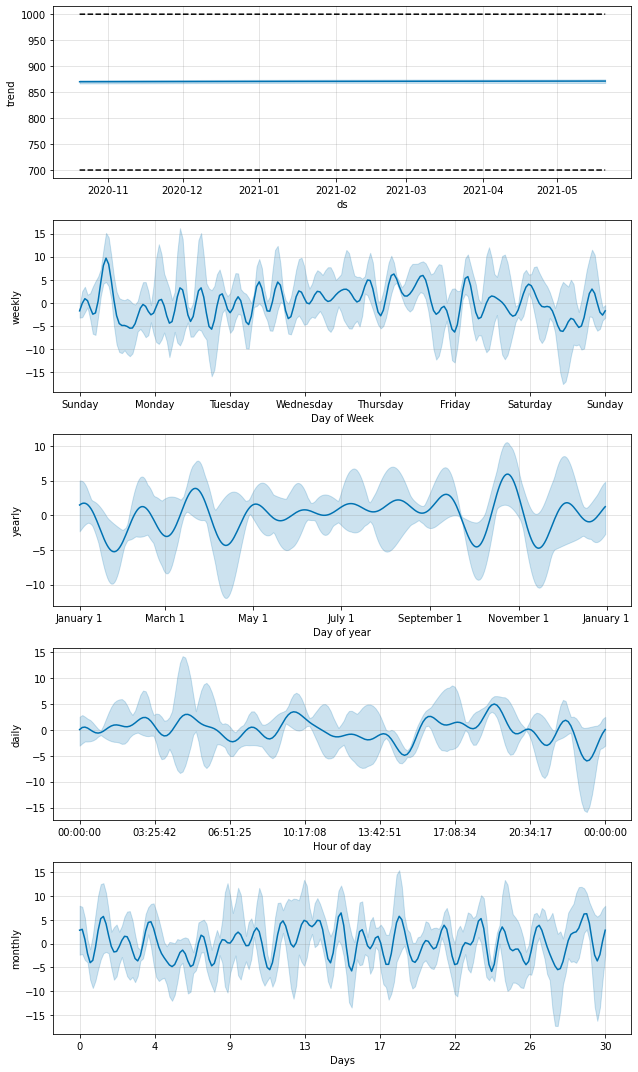

In [61]:
fig2 = model.plot_components(forecast)

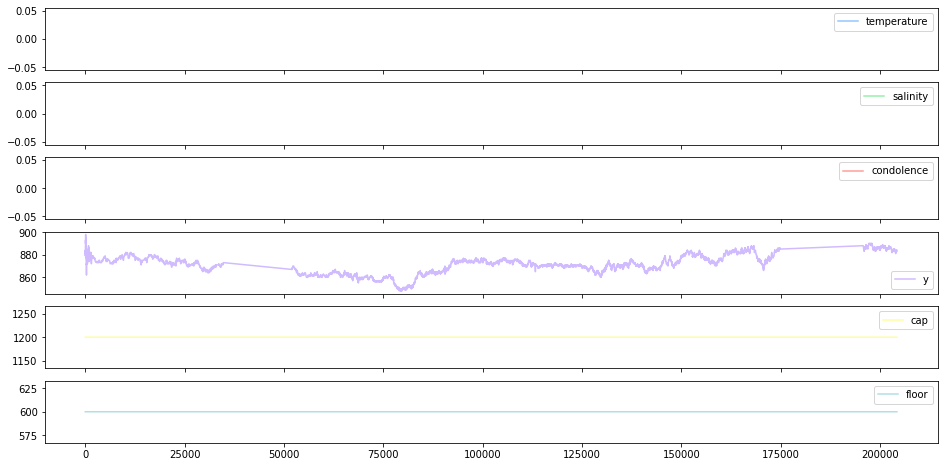

In [17]:
df_prophet2.plot(figsize=(16,8), subplots=True)
plt.show()